## Import Libraries And Read The Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import math
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


In [2]:
df = pd.read_csv('data/main.csv')

## Correlation Heatmap

In [3]:
corr_df = df[df['year'] == 2019]
corr_df.drop(['rank','year'], axis =1, inplace=True)

C:\Users\white\AppData\Local\Temp\ipykernel_16416\1465121674.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corr_df.drop(['rank','year'], axis =1, inplace=True)


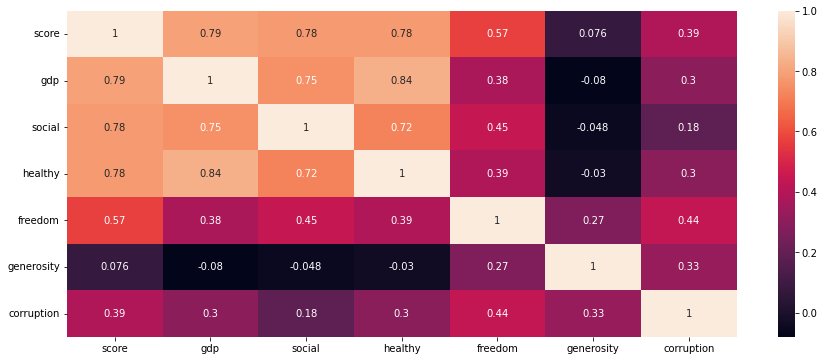

In [4]:
plt.figure(figsize = (15,6))
corr = corr_df.corr()
ax = sns.heatmap(corr, annot=True)

## Plotting Pairwise Relationships

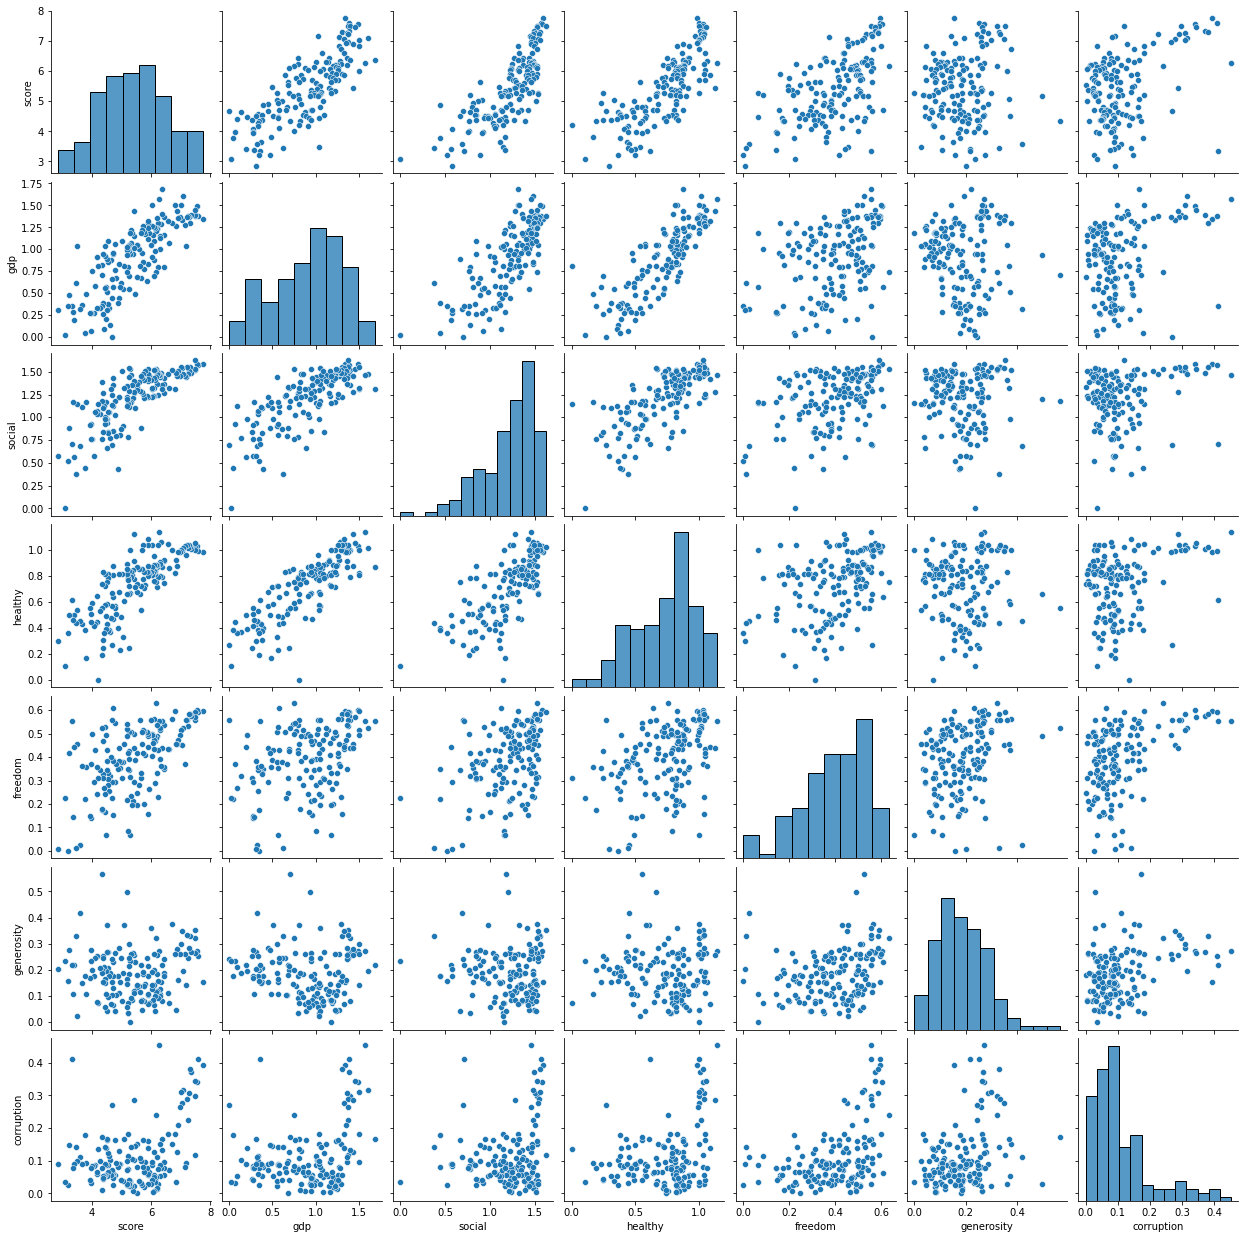

In [5]:
sns.pairplot(corr_df)

## Linear Regression

$$
Y = a + b  X
$$


In [6]:
def linearRegression(df,year):
    pr_df = df[df['year'] == year]

    x = pr_df['gdp'].values.reshape(-1,1)
    y = pr_df['score'].values.reshape(-1,1)
    
    lr = LinearRegression()
    lr.fit(x,y)
    
    #visualization
    y_predict = lr.predict(x)
    plt.scatter(x,y)
    plt.plot(x, y_predict,color = "red")
    plt.xlabel("gdp")
    plt.ylabel("score")
    plt.title("Linear Regression")
    plt.show()
    print("Year: ", year)
    print("a: ", lr.intercept_)
    print("b: ", lr.coef_)
    print("MSE: ", mean_squared_error(y,y_predict))
    print("R Score: {}".format(lr.score(x,y)))

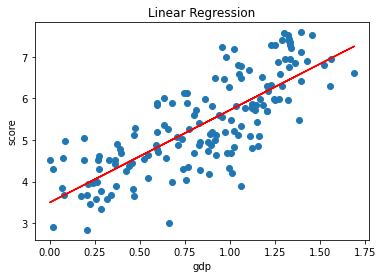

Year:  2015
a:  [3.49880966]
b:  [[2.21822712]]
MSE:  0.5081936248777403
R Score: 0.6099071541531225


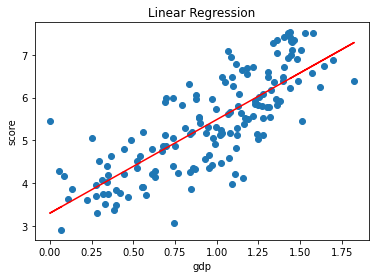

Year:  2016
a:  [3.29618004]
b:  [[2.18686322]]
MSE:  0.4861751800515043
R Score: 0.6246088901220189


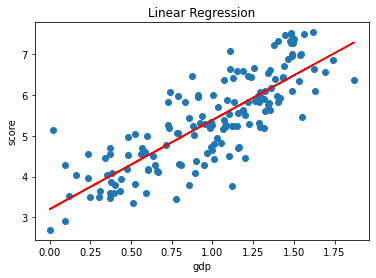

Year:  2017
a:  [3.20321268]
b:  [[2.18418495]]
MSE:  0.43215056729547646
R Score: 0.6601054760421123


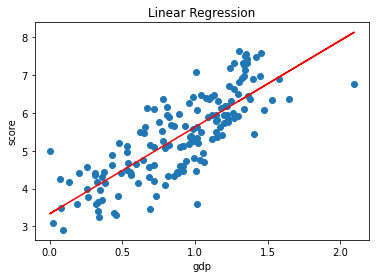

Year:  2018
a:  [3.33339939]
b:  [[2.29123362]]
MSE:  0.4440559910777007
R Score: 0.6434028259180175


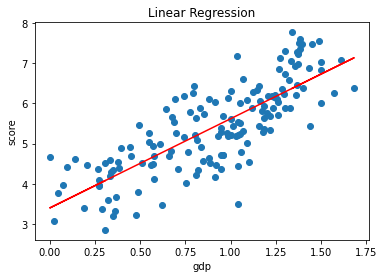

Year:  2019
a:  [3.39934518]
b:  [[2.218148]]
MSE:  0.4551967397324354
R Score: 0.6302500079104005


In [7]:
linearRegression(df,2015)
linearRegression(df,2016)
linearRegression(df,2017)
linearRegression(df,2018)
linearRegression(df,2019)

## Polynomial Regression

$$
Y = a + b_1 X +b_2 X^2\\\\
$$


In [8]:
def polynomialRegression(df, year):
    pr_df = df[df['year'] == year]

    x = pr_df['gdp'].values.reshape(-1,1)
    y = pr_df['score'].values.reshape(-1,1)
    
    pr = PolynomialFeatures(degree = 2)
    x_polynomial = pr.fit_transform(x)
    lr = LinearRegression()
    lr.fit(x_polynomial,y)
           
    y_predict = lr.predict(x_polynomial)
    
    #visualization
    plt.scatter(pr_df["gdp"],pr_df["score"])
    plt.xlabel("GDP per Capital")
    plt.ylabel("Score")
    plt.plot(x,y_predict,color= "green",label = "line")
    plt.legend()
    plt.title("Polynomial Regression")
    plt.show()
    print("Year: ", year)
    print("a: ", lr.intercept_)
    print("b1,b2: ", lr.coef_)
    print("MSE: ", mean_squared_error(y,y_predict))
    print("R_Score: ", r2_score(y,y_predict))
    print("")

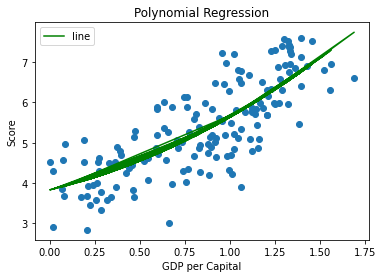

Year:  2015
a:  [3.83108783]
b1,b2:  [[0.         1.0555801  0.74249079]]
MSE:  0.49348038733780686
R_Score:  0.6212011342870815



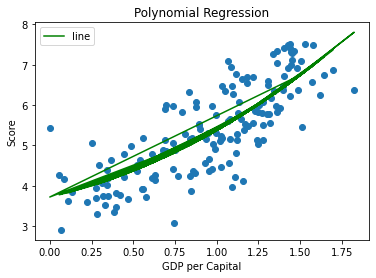

Year:  2016
a:  [3.72072523]
b1,b2:  [[0.         0.92993856 0.71768587]]
MSE:  0.469531143386362
R_Score:  0.6374602730246091



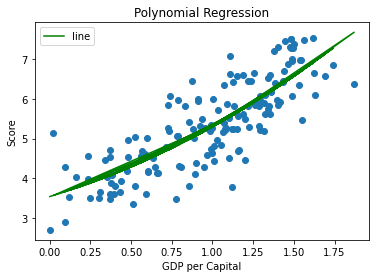

Year:  2017
a:  [3.53604497]
b1,b2:  [[0.         1.23539772 0.52501647]]
MSE:  0.422282614827247
R_Score:  0.6678668056814985



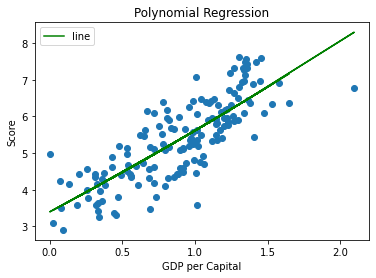

Year:  2018
a:  [3.39817011]
b1,b2:  [[0.         2.09750596 0.11393198]]
MSE:  0.44357445819185853
R_Score:  0.6437895187445282



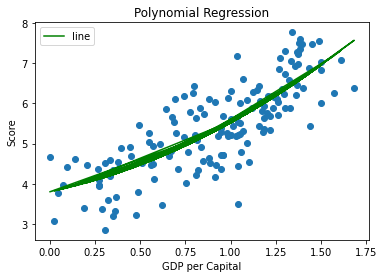

Year:  2019
a:  [3.80056687]
b1,b2:  [[0.         0.94914479 0.7650174 ]]
MSE:  0.43961238312006345
R_Score:  0.6429089644256275



In [9]:
polynomialRegression(df,2015)
polynomialRegression(df,2016)
polynomialRegression(df,2017)
polynomialRegression(df,2018)
polynomialRegression(df,2019)

## Desicion Tree Regression

In [10]:
def desicionTreeRegression(df, year):
    dtr_df = df[df['year'] == year]

    x = dtr_df['social'].values.reshape(-1,1)
    y = dtr_df['score'].values.reshape(-1,1)

    dtr = DecisionTreeRegressor()
    dtr.fit(x,y)
    
    x_space = np.linspace(min(x), max(x)).reshape(-1,1)
    y_predict = dtr.predict(x_space)

    #visualization
    plt.figure(figsize=[5,5])
    plt.scatter(x=x, y=y)
    plt.plot(x_space, y_predict, color="red")
    plt.xlabel("social")
    plt.ylabel("score")
    plt.title("Desicion Tree Regression")
    plt.show()

    print("Year: ", year)
    print("R Score: {}".format(dtr.score(x,y)))
    print(" ")


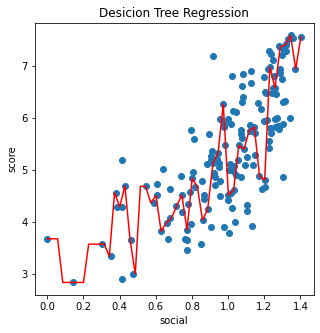

Year:  2015
R Score: 1.0
 


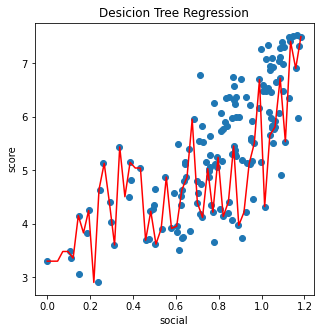

Year:  2016
R Score: 1.0
 


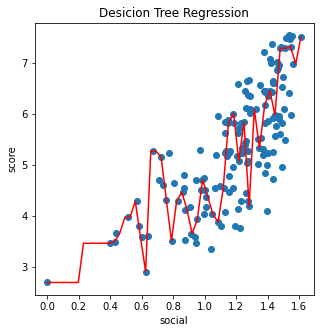

Year:  2017
R Score: 1.0
 


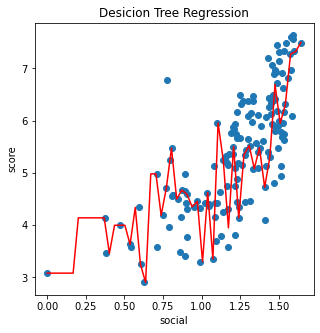

Year:  2018
R Score: 0.9768910627986963
 


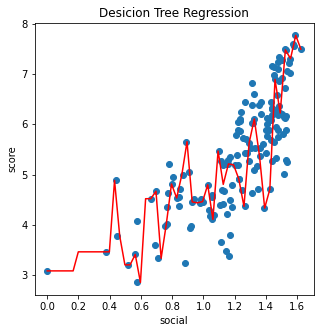

Year:  2019
R Score: 0.969157392006499
 


In [11]:
desicionTreeRegression(df,2015)
desicionTreeRegression(df,2016)
desicionTreeRegression(df,2017)
desicionTreeRegression(df,2018)
desicionTreeRegression(df,2019)

## Random Forest Regression

In [12]:
def randomForestRegression(df, year):
    rfr_df = df[df['year'] == year]

    x = rfr_df['social'].values.reshape(-1,1)
    y = rfr_df['score'].values
    
    rfr = RandomForestRegressor(n_estimators=150, random_state=42)
    rfr.fit(x,y)
    
    x_space = np.linspace(min(x), max(x)).reshape(-1,1)
    y_predict = rfr.predict(x_space)
    
    #visualization
    plt.figure(figsize=[5,5])
    plt.scatter(x=x, y=y)
    plt.xlabel("social")
    plt.ylabel("score")
    plt.plot(x_space, y_predict, color="red")
    plt.title("Random Forest Regression")
    plt.show()

    print("Year: ", year)
    print("R Score: {}".format(rfr.score(x,y)))
    print(" ")

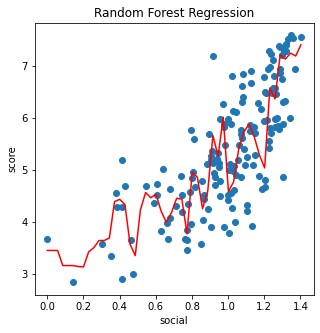

Year:  2015
R Score: 0.9243135210481188
 


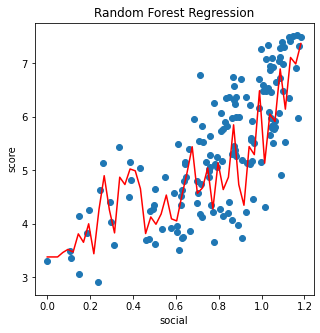

Year:  2016
R Score: 0.9077546998341451
 


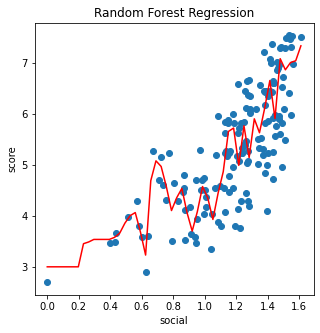

Year:  2017
R Score: 0.9265514958968484
 


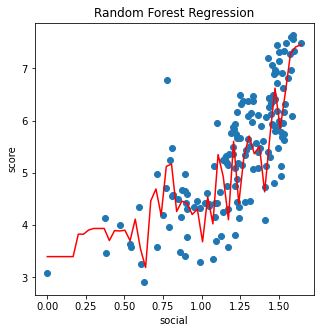

Year:  2018
R Score: 0.9134435689273424
 


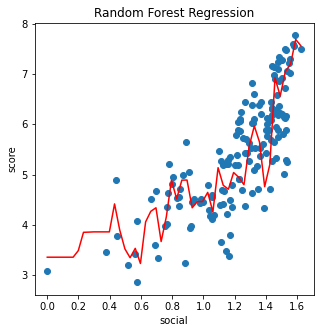

Year:  2019
R Score: 0.9148611389775766
 


In [13]:
randomForestRegression(df, 2015)
randomForestRegression(df, 2016)
randomForestRegression(df, 2017)
randomForestRegression(df, 2018)
randomForestRegression(df, 2019)